<a href="https://colab.research.google.com/github/itsmesaadali/Artificial-intelligence-Project/blob/main/Assignment_(_Short_Project_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Section 1: Setup and Data Loading**

This section imports the necessary Python libraries and loads the Pima Indians Diabetes Dataset by uploading diabetes.csv from your laptop to Google Colab. It displays the first 5 rows to verify successful loading.

In [1]:
# Section 1: Setup and Data Loading
# Purpose: Import libraries and load the Pima Indians Diabetes Dataset
# - Imports libraries for data manipulation, visualization, preprocessing, and modeling
# - Uploads diabetes.csv from your laptop to Colab
# - Loads the dataset into a Pandas DataFrame and displays the first 5 rows

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

# Upload diabetes.csv from your laptop
from google.colab import files
uploaded = files.upload()  # Select 'diabetes.csv' when prompted

# Load the dataset into a Pandas DataFrame
df = pd.read_csv('diabetes.csv')

# Display the first 5 rows to verify loading
print("First 5 rows of the dataset:")
print(df.head())

Saving diabetes.csv to diabetes.csv
First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


**Section 2: Data Exploration and Preprocessing**

This section explores the dataset (shape, types, statistics), handles missing values by replacing zeros with medians, visualizes data with a histogram and heatmap, splits data into training and test sets, and scales features using StandardScaler.


Dataset Shape (rows, columns): (768, 9)

Data Types:
 Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Summary Statistics:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32

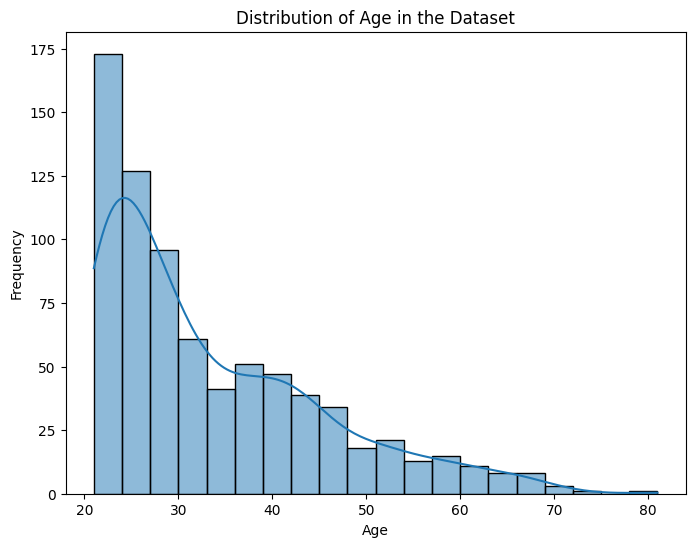

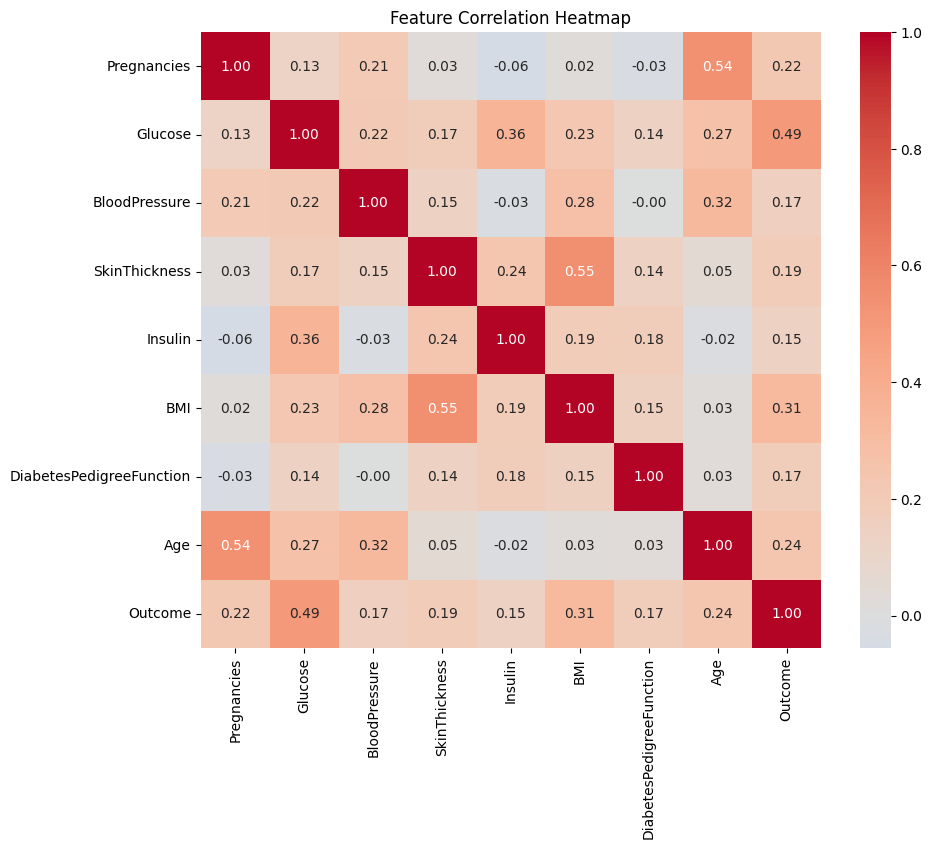


Training set shape: (614, 8)
Test set shape: (154, 8)

Data preprocessing complete.


In [2]:
# Section 2: Data Exploration and Preprocessing
# Purpose: Explore dataset, handle missing values, visualize data, split, and scale
# - Prints dataset shape, data types, summary statistics, and checks for NaNs
# - Replaces zeros in specific columns with median values
# - Creates a histogram of Age and a correlation heatmap (fixed to prevent overlap)
# - Splits data into 80% training and 20% test sets
# - Scales features to mean=0, std=1 using StandardScaler

# Explore dataset
print("\nDataset Shape (rows, columns):", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nSummary Statistics:\n", df.describe())
print("\nMissing Values (NaNs):\n", df.isnull().sum())

# Replace zeros in columns where they are invalid (Glucose, BloodPressure, etc.)
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columns_with_zeros:
    median_value = df[col].median()
    df[col] = df[col].replace(0, median_value)
    print(f"\nReplaced zeros in '{col}' with median: {median_value}")

print("\nSummary Statistics After Replacing Zeros:\n", df.describe())

# Visualize: Histogram of Age
# Create a new figure explicitly to avoid overlap
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Distribution of Age in the Dataset')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
plt.close()  # Close the figure to prevent overlap with the next plot

# Visualize: Correlation heatmap
# Create a new figure explicitly to avoid overlap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()
plt.close()  # Close the figure to ensure no residual plot state

# Split data into features (X) and target (y), then into train/test sets
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nData preprocessing complete.")

**Section 3: Building the Neural Network Model**

This section defines a Feedforward Neural Network with two hidden layers (16 and 8 neurons, ReLU activation) and a sigmoid output layer for binary classification. It compiles the model with the Adam optimizer and binary crossentropy loss.

In [3]:
# Section 3: Building the Neural Network Model
# Purpose: Define and compile a Feedforward Neural Network
# - Architecture: Input (8 features), 2 hidden layers (16 and 8 neurons, ReLU), output (1 neuron, sigmoid)
# - Compilation: Adam optimizer, binary crossentropy loss, accuracy metric

# Define the model
model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_dim=8),  # Hidden layer 1
    keras.layers.Dense(8, activation='relu'),               # Hidden layer 2
    keras.layers.Dense(1, activation='sigmoid')             # Output layer
])

# Display model architecture
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("\nModel compiled successfully.")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)


Model compiled successfully.


**Section 4: Training and Evaluation**

This section trains the neural network for 120 epochs, plots training and validation accuracy/loss, makes predictions on the test set, and evaluates performance with accuracy, confusion matrix, and classification report.

Epoch 1/120
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5251 - loss: 0.9071 - val_accuracy: 0.6016 - val_loss: 0.9895
Epoch 2/120
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6254 - loss: 0.7976 - val_accuracy: 0.6179 - val_loss: 0.8989
Epoch 3/120
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6505 - loss: 0.7242 - val_accuracy: 0.6341 - val_loss: 0.8241
Epoch 4/120
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6279 - loss: 0.7174 - val_accuracy: 0.6423 - val_loss: 0.7629
Epoch 5/120
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6693 - loss: 0.6705 - val_accuracy: 0.6667 - val_loss: 0.7138
Epoch 6/120
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6626 - loss: 0.6407 - val_accuracy: 0.6585 - val_loss: 0.6705
Epoch 7/120
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7233 - loss: 0.5882 - val_accuracy: 0.6911 - val_loss: 0.6358
Epoch 8/120
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6927 - loss: 0.5743 - val_accuracy: 0.7073 - 

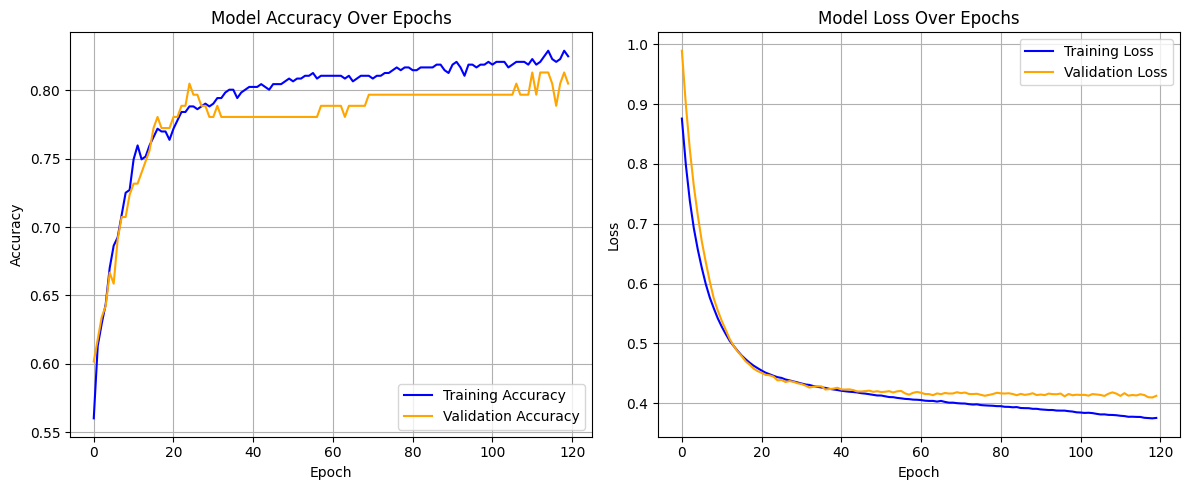

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

Test Accuracy: 0.7597

Confusion Matrix:
[[80 20]
 [17 37]]


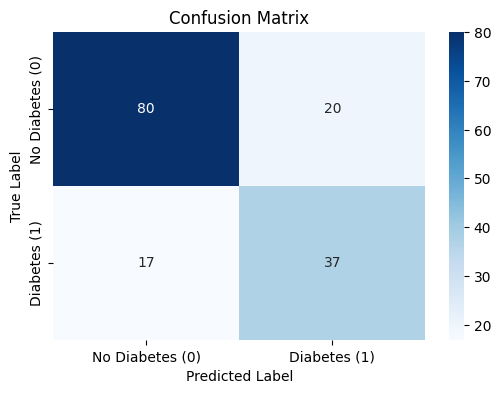


Classification Report:
                 precision    recall  f1-score   support

No Diabetes (0)       0.82      0.80      0.81       100
   Diabetes (1)       0.65      0.69      0.67        54

       accuracy                           0.76       154
      macro avg       0.74      0.74      0.74       154
   weighted avg       0.76      0.76      0.76       154



In [4]:
# Section 4: Training and Evaluation
# Purpose: Train the model, visualize training history, and evaluate on test set
# - Trains for 150 epochs with 20% validation split
# - Plots training/validation accuracy and loss
# - Predicts on test set and evaluates with accuracy, confusion matrix, and classification report

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=120, validation_split=0.2,
                    batch_size=32, verbose=1)

# Plot training history
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Make predictions
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Evaluate: Accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

# Evaluate: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes (0)', 'Diabetes (1)'],
            yticklabels=['No Diabetes (0)', 'Diabetes (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Evaluate: Classification Report
report = classification_report(y_test, y_pred, target_names=['No Diabetes (0)', 'Diabetes (1)'])
print("\nClassification Report:")
print(report)
